In [75]:
from sklearn.datasets import load_digits

digits = load_digits()


## Dataset info

In [76]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [77]:
digits.target.shape

(1797,)

In [78]:
digits.data.shape

(1797, 64)

In [79]:
digits.images.shape

(1797, 8, 8)

3


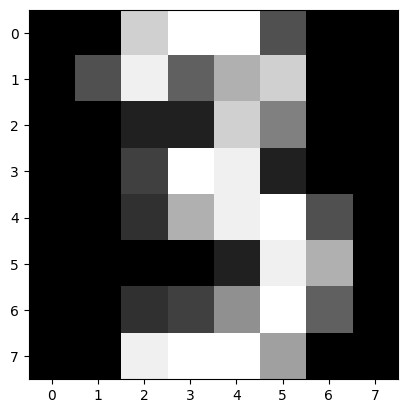

In [80]:
import matplotlib.pyplot as plt

x = digits.images[1504]
print(digits.target[1504])
plt.gray()
plt.imshow(x)
plt.show()

## Preprocessing

### Spilit Data

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [82]:
print (f" Feuture ==> train : {X_train.shape} -- Test : {X_test.shape}")
print (f" Label ==> train : {y_train.shape} -- Test : {y_test.shape}")

 Feuture ==> train : (1437, 64) -- Test : (360, 64)
 Label ==> train : (1437,) -- Test : (360,)


### Normilize

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
X_train[0]

array([0.        , 0.        , 0.        , 0.875     , 0.4375    ,
       0.        , 0.        , 0.        , 0.        , 0.0625    ,
       0.5625    , 1.        , 1.        , 0.1875    , 0.        ,
       0.        , 0.        , 0.25      , 1.        , 0.5       ,
       0.6875    , 0.6875    , 0.        , 0.        , 0.        ,
       0.2       , 1.        , 0.4375    , 0.25      , 1.        ,
       0.26666667, 0.        , 0.        , 0.57142857, 1.        ,
       0.25      , 0.        , 1.        , 0.57142857, 0.        ,
       0.        , 0.3125    , 1.        , 0.625     , 0.        ,
       0.8125    , 0.6875    , 0.        , 0.        , 0.        ,
       0.8125    , 1.        , 1.        , 1.        , 0.5625    ,
       0.        , 0.        , 0.        , 0.125     , 0.625     ,
       0.8125    , 0.375     , 0.        , 0.        ])

### PCA

In [85]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_train = pca.fit_transform(X_train)
X_test =pca.transform(X_test)

In [87]:
X_train.shape, X_test.shape

((1437, 32), (360, 32))

### Performance Metric Function

In [88]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score , accuracy_score

def calculation_metrics (y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score (y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score (y_true=y_test, y_pred=y_pred_test)

    p = precision_score (y_test , y_pred_test, average='weighted')
    r = recall_score(y_test, y_pred_test, average='weighted')
    cm = confusion_matrix(y_test, y_pred_test)

    print(f"acc train = {acc_train} \n acc test = {acc_test} \n Precision score test = {p} \n Recall test = {r} \n Confusion Matrix Test = \n {cm}")

    return acc_train, acc_test, p, r, cm


### Classification

#### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 128 , n_estimators=256)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [90]:
y_pred_train = rf.predict(X_train)
y_pred_test =rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, cm_rf = calculation_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc train = 1.0 
 acc test = 0.9861111111111112 
 Precision score test = 0.9864257614257615 
 Recall test = 0.9861111111111112 
 Confusion Matrix Test = 
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  2]
 [ 0  0  0  0  1  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  1 31]]


#### SVM

In [91]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [92]:
y_pred_train = svm.predict(X_train)
y_pred_test =svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, cm_svm = calculation_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc train = 0.9993041057759221 
 acc test = 0.9861111111111112 
 Precision score test = 0.9869551369551369 
 Recall test = 0.9861111111111112 
 Confusion Matrix Test = 
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  1  2]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  1 31]]


#### ANN

In [93]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes= 64, activation='relu', solver='adam', batch_size= 8, learning_rate='adaptive')
ann.fit(X_train, y_train)

MLPClassifier(batch_size=8, hidden_layer_sizes=64, learning_rate='adaptive')

In [94]:
y_pred_train = ann.predict(X_train)
y_pred_test =ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, cm_ann = calculation_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc train = 1.0 
 acc test = 0.9805555555555555 
 Precision score test = 0.9813105793988147 
 Recall test = 0.9805555555555555 
 Confusion Matrix Test = 
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  3]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  1  0  0  0  0 32  0]
 [ 0  0  0  1  0  0  0  0  0 31]]


#### KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [96]:
y_pred_train = knn.predict(X_train)
y_pred_test =knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, cm_knn = calculation_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc train = 0.988865692414753 
 acc test = 0.9833333333333333 
 Precision score test = 0.9836345136345137 
 Recall test = 0.9833333333333333 
 Confusion Matrix Test = 
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  2]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  1 30]]


### Comparision

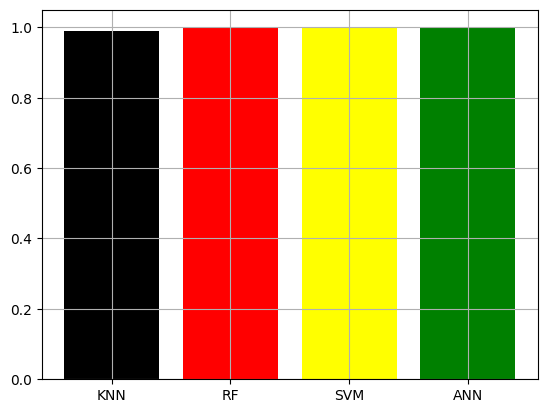

In [97]:
import matplotlib.pyplot as plt

acc_train = [ acc_train_knn, acc_train_rf, acc_train_svm,  acc_train_ann]
title = [ "KNN",  "RF", "SVM", "ANN"]
colors = ["black", "red", "yellow", "green"]
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

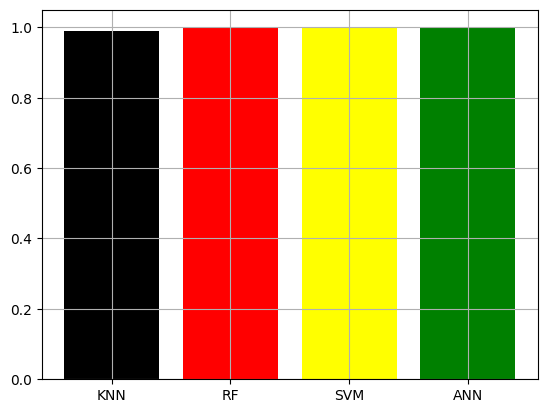

In [98]:
import matplotlib.pyplot as plt

acc_test = [ acc_test_knn, acc_test_rf, acc_test_svm,  acc_test_ann]
title = [ "KNN",  "RF", "SVM", "ANN"]
colors = ["black", "red", "yellow", "green"]
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

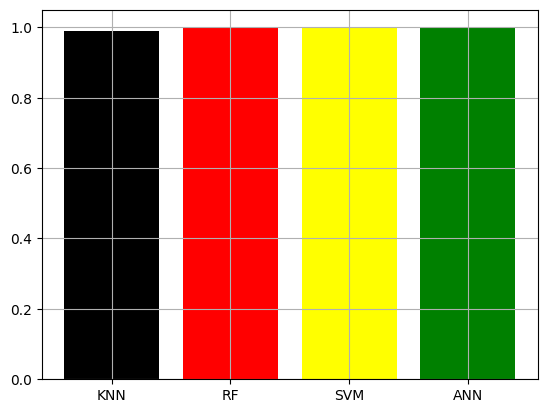

In [99]:
import matplotlib.pyplot as plt

p = [ p_knn, p_rf, p_svm,  p_ann]
title = [ "KNN",  "RF", "SVM", "ANN"]
colors = ["black", "red", "yellow", "green"]
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

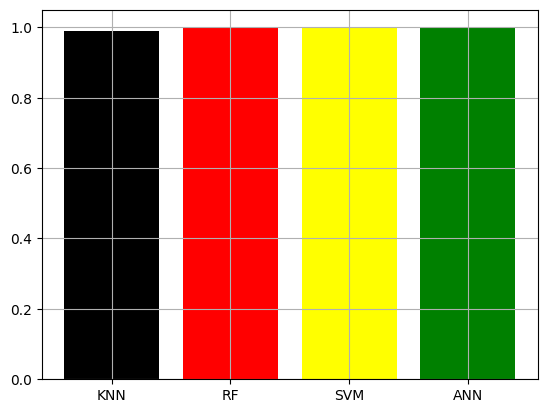

In [100]:
import matplotlib.pyplot as plt

r = [ r_knn, r_rf, r_svm,  r_ann]
title = [ "KNN",  "RF", "SVM", "ANN"]
colors = ["black", "red", "yellow", "green"]
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()